In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../Dataset/Palladium.csv")

In [3]:
df.head()

,Date,Open,Close,High,Low
0,2018-01-01,1067.5,1067.5,1067.5,1067.5
1,2018-01-02,1066.5,1096.0,1099.0,1066.0
2,2018-01-03,1095.5,1088.0,1097.0,1084.0
3,2018-01-04,1086.5,1102.5,1108.5,1083.5
4,2018-01-05,1100.0,1091.5,1103.0,1086.5


In [4]:
df = df[["Close"]]
df.reset_index(drop=True)
df.isnull().sum()

Close    0
dtype: int64

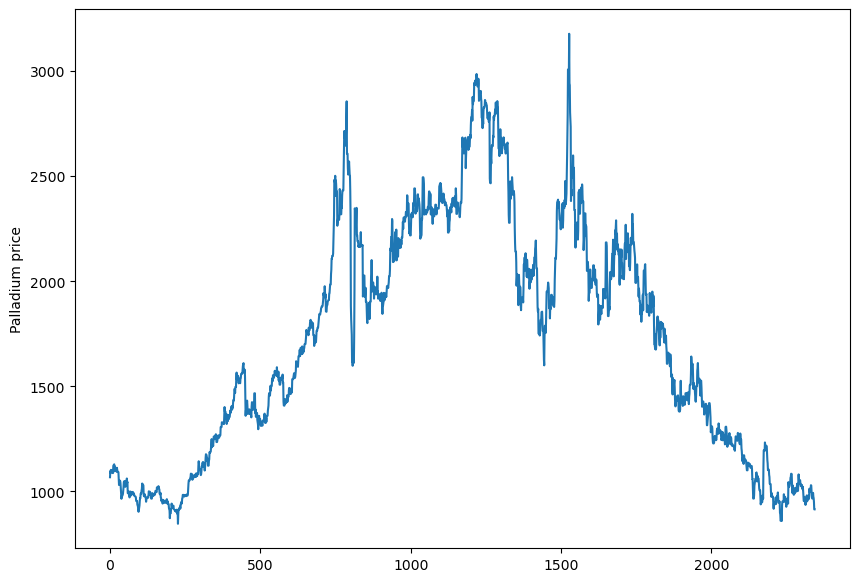

In [5]:
df.Close.plot(figsize = (10, 7))
plt.ylabel("Palladium price")
plt.show()


In [6]:
t = .7
t = int(t * len(df))

data_train = df[:t]
data_test = df[t:]

In [7]:
# Chia các tập x,y train, test tương ứng
X_train = np.array(data_train.index).reshape(-1, 1)  #Lấy chỉ mục Index
y_train = np.array(data_train['Close']) #Lấy dữ liệu giá Close

X_test = np.array(data_test.index).reshape(-1, 1)  #Lấy chỉ mục Index
y_test = np.array(data_test['Close']) #Lấy dữ liệu giá Close

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
#Tạo mô hình hồi quy tuyến tính y = m*X1 + c
linear = LinearRegression().fit(X_train, y_train)
print("m1: " , linear.coef_[0])
print("c: " , linear.intercept_)

m1:  1.014020988703194
c:  1008.4067509772448


In [10]:
predicted_price = linear.predict(X_test)
predicted = pd.DataFrame(predicted_price, columns = ['Close'])
predicted

,Close
0,2671.401172
1,2672.415193
2,2673.429214
3,2674.443235
4,2675.457256
...,...
699,3380.201844
700,3381.215865
701,3382.229886
702,3383.243907


In [11]:
mape = np.mean(np.abs(predicted_price - y_test)/np.abs(y_test)) *100
mse = np.mean(np.square(y_test - predicted_price))
rmse = np.sqrt(mse)

print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Percentage Error (MAPE): 130.7781387742576
Mean Squared Error (MSE): 2885808.8926417017
Root Mean Squared Error (RMSE): 1698.7668741300854


In [12]:
dt_train = np.append(data_train, predicted['Close'][0]) 

In [13]:
# Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = linear.predict(x_next_90_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[3385.2719485  3386.28596949 3387.29999047 3388.31401146 3389.32803245
 3390.34205344 3391.35607443 3392.37009542 3393.38411641 3394.3981374
 3395.41215838 3396.42617937 3397.44020036 3398.45422135 3399.46824234
 3400.48226333 3401.49628432 3402.51030531 3403.52432629 3404.53834728
 3405.55236827 3406.56638926 3407.58041025 3408.59443124 3409.60845223
 3410.62247322 3411.6364942  3412.65051519 3413.66453618 3414.67855717
 3415.69257816 3416.70659915 3417.72062014 3418.73464112 3419.74866211
 3420.7626831  3421.77670409 3422.79072508 3423.80474607 3424.81876706
 3425.83278805 3426.84680903 3427.86083002 3428.87485101 3429.888872
 3430.90289299 3431.91691398 3432.93093497 3433.94495596 3434.95897694
 3435.97299793 3436.98701892 3438.00103991 3439.0150609  3440.02908189
 3441.04310288 3442.05712386 3443.07114485 3444.08516584 3445.09918683
 3446.11320782 3447.12722881 3448.1412498  3449.15527079 3450.16929177
 3451.18331276 3452.19733375 3453

In [14]:
plt.rcParams['figure.figsize'] = [18, 10]

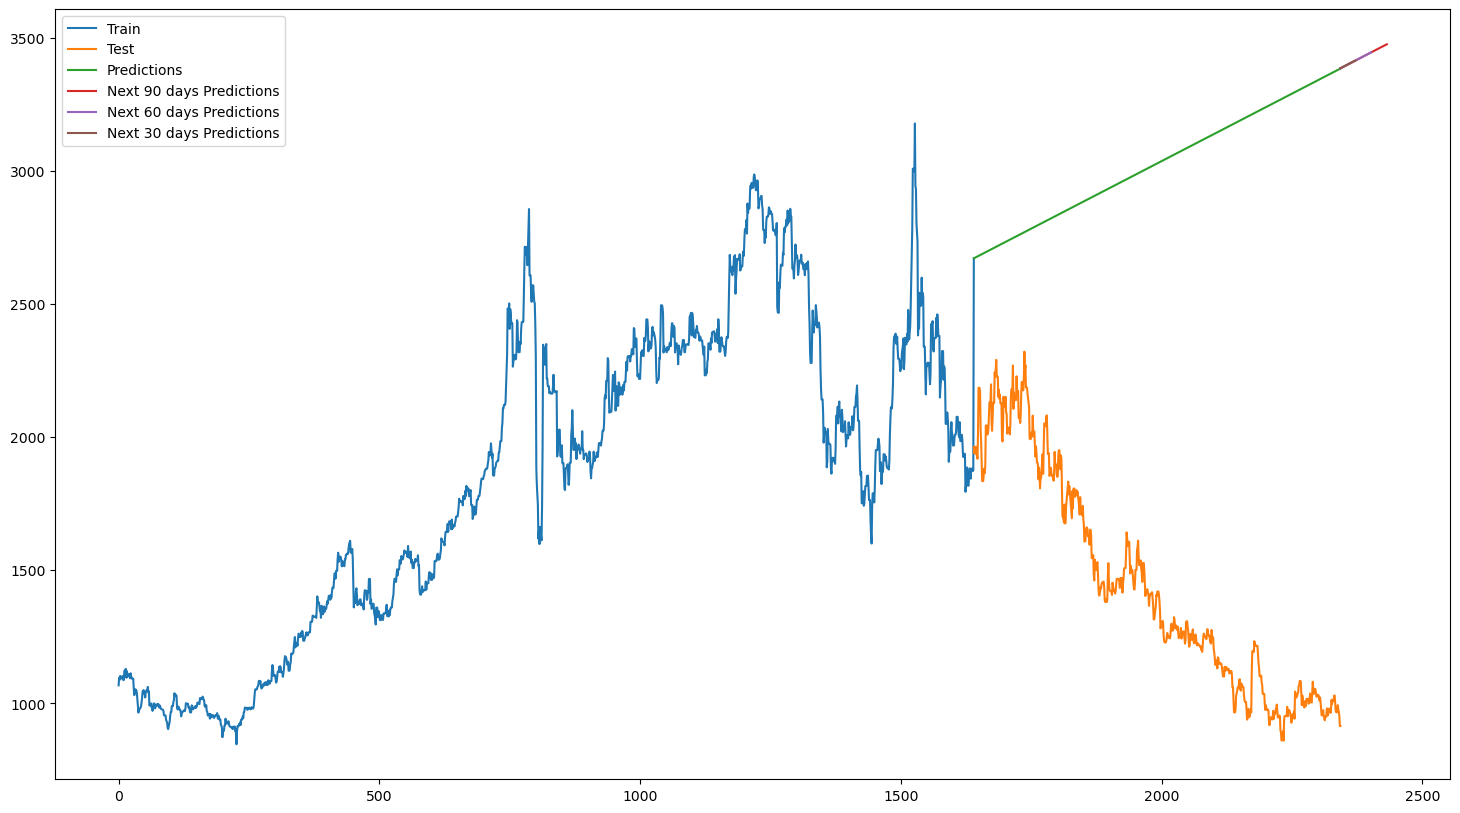

In [15]:
plt.plot(pd.RangeIndex(start=0, stop=len(dt_train), step=1), dt_train)
plt.plot(data_test.index, data_test['Close'])
plt.plot(data_test.index, predicted['Close'])
plt.plot(last_data,y_next_90_days)
plt.plot(pd.RangeIndex(start=last_index, stop=last_index+60, step=1),y_next_90_days[0:60])
plt.plot(pd.RangeIndex(start=last_index, stop=last_index+30, step=1),y_next_90_days[0:30])
plt.legend(['Train', 'Test', 'Predictions', 'Next 90 days Predictions', 'Next 60 days Predictions', 'Next 30 days Predictions'])
plt.show()